<a href="https://colab.research.google.com/github/gongx030/Etv2_pioneer/blob/master/Brg1_KD_ChIP_data_Enriched_Heatmap_at_Etv2_Binding_Sites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By Nikita Dsouza

The goal of this notebook is to look at the BRG1 Knocked Down ChIP seq data's enrichment at canonical Etv2 binding sites.

In [1]:
start_time0 <- Sys.time()
options(max.print=1000)

### Install external packages

In [2]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [3]:
system('apt-get install libcairo2-dev', intern = TRUE) # for Cairo package that is required by ComplexHeatmap package

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

## Install R packages

In [4]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
required_packages <- c(
  'devtools', 'BiocManager', 
  'circlize',
  'GenomicRanges', 'rtracklayer', 'EnrichedHeatmap', 'BSgenome.Mmusculus.UCSC.mm10', 
   'motifmatchr', 'chromVAR'
)

In [6]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'BiocVersion', 'circlize', 'GenomicRanges',
  'rtracklayer', 'EnrichedHeatmap', 'BSgenome.Mmusculus.UCSC.mm10',
  'motifmatchr', 'chromVAR'

also installing the dependencies ‘plyr’, ‘pracma’, ‘AnnotationDbi’, ‘R.oo’, ‘R.methodsS3’, ‘formatR’, ‘iterators’, ‘reshape2’, ‘poweRlaw’, ‘annotate’, ‘GO.db’, ‘R.utils’, ‘KEGGREST’, ‘plogr’, ‘lambda.r’, ‘futile.options’, ‘sass’, ‘GenomeInfoDbData’, ‘bitops’, ‘Rhtslib’, ‘rjson’, ‘clue’, ‘png’, ‘Cairo’, ‘foreach’, ‘doParallel’, ‘Biobase’, ‘caTools’, ‘CNEr’, ‘DirichletMultinomial’, ‘gtools’, ‘RSQLite’, ‘seqLogo’, ‘TFMPvalue’, ‘MatrixGenerics’, ‘DelayedArray’, ‘RcppEigen’, ‘BH’, ‘futile.logger’, ‘snow’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetool

In [7]:
library(devtools)

Loading required package: usethis



### Install R packages that are not available on CRAN or Bioc

In [8]:
if (!require('chromVARmotifs'))
  devtools::install_github("GreenleafLab/chromVARmotifs")

Loading required package: chromVARmotifs

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘chromVARmotifs’”



pillar    (1.6.2  -> 1.6.3 ) [CRAN]
stringi   (1.7.4  -> 1.7.5 ) [CRAN]
openssl   (1.4.3  -> 1.4.5 ) [CRAN]
mime      (0.11   -> 0.12  ) [CRAN]
cpp11     (0.3.1  -> 0.4.0 ) [CRAN]
lifecycle (1.0.0  -> 1.0.1 ) [CRAN]
hms       (1.1.0  -> 1.1.1 ) [CRAN]
tibble    (3.1.4  -> 3.1.5 ) [CRAN]
digest    (0.6.27 -> 0.6.28) [CRAN]
readr     (2.0.1  -> 2.0.2 ) [CRAN]


Installing 10 packages: pillar, stringi, openssl, mime, cpp11, lifecycle, hms, tibble, digest, readr

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpZMQkKx/remotes4c68971415/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’
─  preparing ‘chromVARmotifs’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘chromVARmotifs_0.2.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Load R packages

In [9]:
library(GenomicRanges)
library(dplyr)
library(BSgenome.Mmusculus.UCSC.mm10)
library(motifmatchr)
library(chromVARmotifs)
library(SummarizedExperiment)
library(ggplot2)
library(ComplexHeatmap)
library(EnrichedHeatmap)
library(circlize) # colorRamp2

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The follow

In [10]:
devtools::install_github("YuLab-SMU/ChIPseeker")
library(ChIPseeker)

enrichplot   (NA     -> d11b60bb6...) [GitHub]
filelock     (NA     -> 1.0.2       ) [CRAN]
BiocFileC... (NA     -> 2.0.0       ) [CRAN]
biomaRt      (NA     -> 2.48.3      ) [CRAN]
gridGraphics (NA     -> 0.5-1       ) [CRAN]
patchwork    (NA     -> 1.1.1       ) [CRAN]
ggplotify    (NA     -> 0.1.0       ) [CRAN]
yulab.utils  (NA     -> 0.0.4       ) [CRAN]
treeio       (NA     -> 1.16.2      ) [CRAN]
tidytree     (NA     -> 0.3.5       ) [CRAN]
tidyr        (1.1.3  -> 1.1.4       ) [CRAN]
ggfun        (NA     -> 0.0.4       ) [CRAN]
aplot        (NA     -> 0.1.1       ) [CRAN]
ape          (NA     -> 5.5         ) [CRAN]
polyclip     (NA     -> 1.10-0      ) [CRAN]
tweenr       (NA     -> 1.0.2       ) [CRAN]
ggforce      (NA     -> 0.3.3       ) [CRAN]
gridExtra    (NA     -> 2.3         ) [CRAN]
graphlayouts (NA     -> 0.7.1       ) [CRAN]
tidygraph    (NA     -> 1.2.0       ) [CRAN]
viridis      (NA     -> 0.6.1       ) [CRAN]
ggrepel      (NA     -> 0.9.1       ) [CRAN]
igraph  

tidyr        (1.1.3  -> 1.1.4 ) [CRAN]
tidytree     (NA     -> 0.3.5 ) [CRAN]
ape          (NA     -> 5.5   ) [CRAN]
gridGraphics (NA     -> 0.5-1 ) [CRAN]
yulab.utils  (NA     -> 0.0.4 ) [CRAN]
patchwork    (NA     -> 1.1.1 ) [CRAN]
ggplotify    (NA     -> 0.1.0 ) [CRAN]
ggfun        (NA     -> 0.0.4 ) [CRAN]
igraph       (NA     -> 1.2.6 ) [CRAN]
gridExtra    (NA     -> 2.3   ) [CRAN]
polyclip     (NA     -> 1.10-0) [CRAN]
tweenr       (NA     -> 1.0.2 ) [CRAN]
fastmatch    (NA     -> 1.1-3 ) [CRAN]
data.table   (1.14.0 -> 1.14.2) [CRAN]
treeio       (NA     -> 1.16.2) [CRAN]
aplot        (NA     -> 0.1.1 ) [CRAN]
ggforce      (NA     -> 0.3.3 ) [CRAN]
graphlayouts (NA     -> 0.7.1 ) [CRAN]
tidygraph    (NA     -> 1.2.0 ) [CRAN]
viridis      (NA     -> 0.6.1 ) [CRAN]
ggrepel      (NA     -> 0.9.1 ) [CRAN]
qvalue       (NA     -> 2.24.0) [CRAN]
GOSemSim     (NA     -> 2.18.1) [CRAN]
fgsea        (NA     -> 1.18.0) [CRAN]
DO.db        (NA     -> 2.9   ) [CRAN]
ggtree       (NA     -> 3

Installing 30 packages: tidyr, tidytree, ape, gridGraphics, yulab.utils, patchwork, ggplotify, ggfun, igraph, gridExtra, polyclip, tweenr, fastmatch, data.table, treeio, aplot, ggforce, graphlayouts, tidygraph, viridis, ggrepel, qvalue, GOSemSim, fgsea, DO.db, ggtree, shadowtext, scatterpie, ggraph, DOSE

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpZMQkKx/remotes4c4a15568d/GuangchuangYu-enrichplot-d11b60b/DESCRIPTION’
─  preparing ‘enrichplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘enrichplot_1.13.1.992.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing 38 packages: filelock, BiocFileCache, biomaRt, gridGraphics, patchwork, ggplotify, yulab.utils, treeio, tidytree, tidyr, ggfun, aplot, ape, polyclip, tweenr, ggforce, gridExtra, graphlayouts, tidygraph, viridis, ggrepel, igraph, fastmatch, data.table, qvalue, GOSemSim, fgsea, DO.db, GenomicFeatures, ggtree, shadowtext, scatterpie, ggraph, DOSE, cowplot, TxDb.Hsapiens.UCSC.hg19.knownGene, plotrix, gplots

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'enrichplot' from a github remote, the SHA1 (d11b60bb) has not changed since last install.
  Use `force = TRUE` to force installation



✔  checking for file ‘/tmp/RtmpZMQkKx/remotes4c64159712/YuLab-SMU-ChIPseeker-c8878be/DESCRIPTION’
─  preparing ‘ChIPseeker’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ChIPseeker_1.29.1.991.tar.gz’ (2.4s)
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

ChIPseeker v1.29.1.991  For help: https://guangchuangyu.github.io/software/ChIPseeker

If you use ChIPseeker in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Qing-Yu He. ChIPseeker: an R/Bioconductor package for ChIP peak annotation, comparison and visualization. Bioinformatics 2015, 31(14):2382-2383



## Read a combined Etv2 ChIP-seq peak set

In [11]:
all_etv2_peaks_url <- 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/all_Etv2_peaks.rds'
gr <- all_etv2_peaks_url %>%
  url() %>%
  gzcon() %>%
  readRDS()
gr
colnames(gr$group)

GRanges object with 162010 ranges and 4 metadata columns:
           seqnames            ranges strand |                peak_id     score
              <Rle>         <IRanges>  <Rle> |            <character> <numeric>
       [1]     chr1   3037784-3037983      * | /panfs/roc/scratch/g..  16.22768
       [2]     chr1   3263790-3263989      * | /panfs/roc/scratch/g..   8.36521
       [3]     chr1   3344682-3344881      * | /panfs/roc/scratch/g..   9.73217
       [4]     chr1   3460640-3460839      * | /panfs/roc/scratch/g..   3.92081
       [5]     chr1   3490314-3490513      * | /panfs/roc/scratch/g..  12.29730
       ...      ...               ...    ... .                    ...       ...
  [162006]     chrY 90828936-90829135      * | /panfs/roc/scratch/g.. 160.15463
  [162007]     chrY 90836259-90836458      * | /panfs/roc/scratch/g..   8.27339
  [162008]     chrY 90841624-90841823      * | /panfs/roc/scratch/g..   1.53792
  [162009]     chrY 90842563-90842762      * | /panfs/roc/scra

[1] "MEF_Dox_d1_Etv2" "MEF_Dox_d2_Etv2" "MEF_Dox_d7_Etv2" "EB_Dox_3h_Etv2" 
[5] "EB_Dox_12h_Etv2"

## Download related `pileup` and `fold enrichment` bigwig files

In [12]:
bw_files <- c(
	'MEF_Dox_D1_Etv2' 									= 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d1_Etv2_FE.bw',
	'MEF_Dox_D7_Etv2' 									= 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d7_Etv2_FE.bw',
	'Brg1_KD_D1' 										= 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_PioneerFactor_Manuscript/Brg1_KD_D1_Etv2_Repeat.dedup_FE_sorted.bw',
	'Brg1_KD_D7' 										= 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_PioneerFactor_Manuscript/Brg1_KD_D7_Etv2_Repeat.dedup_FE_sorted.bw'
)

In [13]:
for (i in 1:length(bw_files)){
  sprintf('wget -x -c -nH %s', bw_files[i]) %>% system()
}
local_bw_files <- gsub('https://s3.msi.umn.edu/', './', bw_files)
message(sprintf('all local_bw_files exist: %s', all(file.exists(local_bw_files))))

all local_bw_files exist: TRUE



## Split the Etv2 MEF D1 peaks into three groups
1. on at D1 and off at D7 (early)
2. off at D1 and on at D7 (late)
3. on at both D1 and D7 (sustained)

In [14]:
peaks <- gr[gr$group[, 'MEF_Dox_d1_Etv2'] | gr$group[, 'MEF_Dox_d7_Etv2']]
message(sprintf('number of early peaks: %d\n', sum(peaks$group[, 'MEF_Dox_d1_Etv2'] & !peaks$group[, 'MEF_Dox_d7_Etv2'])))
message(sprintf('number of late peaks: %d\n', sum(!peaks$group[, 'MEF_Dox_d1_Etv2'] & peaks$group[, 'MEF_Dox_d7_Etv2'])))
message(sprintf('number of sustained peaks: %d\n', sum(peaks$group[, 'MEF_Dox_d1_Etv2'] & peaks$group[, 'MEF_Dox_d7_Etv2'])))

number of early peaks: 111167


number of late peaks: 4222


number of sustained peaks: 12170




## Load motifs and get binding sites containing Etv2 canonical motif

In [15]:
data('homer_pwms')

In [16]:
data('homer_pwms')
Etv2_canonical <- homer_pwms[['Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer(0.967)']]
Etv2_canonical

An object of class PWMatrix
ID: Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer(0.967)
Name: Etv2(ETS)
Matrix Class: Unknown
strand: +
Pseudocounts: 
Tags: 
$evidence
[1] "ES-ER71-ChIP-Seq(GSE59402)"

$source
[1] "Homer(0.967)"

Background: 
   A    C    G    T 
0.25 0.25 0.25 0.25 
Matrix: 
         [,1]       [,2]        [,3]       [,4]        [,5]      [,6]      [,7]
A -0.16016875 -0.3856625  0.60758929 -2.3859667  0.08801088 -5.521461 -5.521461
C  0.18564935  0.1988509 -0.60880603  0.6418539 -5.52146092 -5.521461  1.383290
G  0.02371653 -0.0618754  0.06203539 -0.9571127 -2.74887220 -5.521461 -5.521461
T -0.08338161  0.1484200 -0.58698698  0.4848922  1.04380405  1.383290 -5.521461
       [,8]       [,9]       [,10]      [,11]       [,12]
A -5.521461 -2.4304185 -1.53247687 -0.1544844 -0.46621461
C  1.383290 -2.4304185 -0.03666398  0.1071607  0.09066769
G -5.521461  0.4134333  0.69912925 -0.3787969  0.09431068
T -5.521461  0.8381130 -0.21319322  0.2966507  0.16451494

## Parameter selected by Dr. Wuming's colab notebook

In [17]:
cutoff <- 5e-4
width <- 50L

In [18]:
motif_ix <- matchMotifs(
  homer_pwms['Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer(0.967)'], 
  resize(peaks, width = width, fix = 'center'), 
  genome = BSgenome.Mmusculus.UCSC.mm10,
  p.cutoff = cutoff
)
has_motif_MEF  <- assays(motif_ix)$motifMatches
colnames(has_motif_MEF) <- c('canonical')

In [19]:
params <- expand.grid(
  cutoff = c(5e-2, 5e-3, 5e-4, 5e-5, 5e-6, 5e-7),
  width = c(25L, 50L, 75L, 100L)
)

In [20]:
B <- do.call('cbind', lapply(1:nrow(params), function(i){ 
  motif_ix <- matchMotifs(
    homer_pwms['Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer(0.967)'], 
    resize(peaks, width = params[i, 'width'], fix = 'center'), 
    genome = BSgenome.Mmusculus.UCSC.mm10,
    p.cutoff = params[i, 'cutoff']
  )
  assays(motif_ix)$motifMatches[, 1]
}))

In [21]:
has_motif <- B[, which(params$width == 50 & params$cutoff == 5e-4)]

In [22]:
sprintf('number of Etv2 peaks in MEFS: %d', length(peaks)) %>% message()
sprintf('number of Etv2 peaks with canonical Etv2 motifs in MEFS: %d', length(peaks[has_motif])) %>% message()

number of Etv2 peaks in MEFS: 127559

number of Etv2 peaks with canonical Etv2 motifs in MEFS: 21343



In [23]:
peaks <- gr[gr$group[, 'MEF_Dox_d1_Etv2'] | gr$group[, 'MEF_Dox_d7_Etv2']]
message(sprintf('number of early peaks: %d\n', sum(has_motif & peaks$group[, 'MEF_Dox_d1_Etv2'] & !peaks$group[, 'MEF_Dox_d7_Etv2'])))
message(sprintf('number of late peaks: %d\n', sum(has_motif & !peaks$group[, 'MEF_Dox_d1_Etv2'] & peaks$group[, 'MEF_Dox_d7_Etv2'])))
message(sprintf('number of sustained peaks: %d\n', sum(has_motif& peaks$group[, 'MEF_Dox_d1_Etv2'] & peaks$group[, 'MEF_Dox_d7_Etv2'])))

number of early peaks: 14074


number of late peaks: 2304


number of sustained peaks: 4965




## Prepare normalized matrix for `EnrichedHeatmap`

In [24]:
peaks[has_motif]

GRanges object with 21343 ranges and 4 metadata columns:
          seqnames            ranges strand |                peak_id     score
             <Rle>         <IRanges>  <Rle> |            <character> <numeric>
      [1]     chr1   4433661-4433860      * | /panfs/roc/scratch/g..   17.3565
      [2]     chr1   4496394-4496593      * | /panfs/roc/scratch/g..   11.5497
      [3]     chr1   4775141-4775340      * | /panfs/roc/scratch/g..    3.5591
      [4]     chr1   4857544-4857743      * | /panfs/roc/scratch/g..   52.1944
      [5]     chr1   5019447-5019646      * | /panfs/roc/scratch/g..   20.3490
      ...      ...               ...    ... .                    ...       ...
  [21339]     chrY 90792123-90792322      * | /panfs/roc/scratch/g..   27.7675
  [21340]     chrY 90798976-90799175      * | /panfs/roc/scratch/g..   51.0622
  [21341]     chrY 90805721-90805920      * | /panfs/roc/scratch/g..   19.0219
  [21342]     chrY 90808403-90808602      * | /panfs/roc/scratch/g..   23.

In [25]:
sprintf('number of Etv2 peaks in MEFS: %d', length(peaks)) %>% message()
sprintf('number of Etv2 peaks with canonical Etv2 motifs in MEFS: %d', length(peaks[has_motif])) %>% message()

number of Etv2 peaks in MEFS: 127559

number of Etv2 peaks with canonical Etv2 motifs in MEFS: 21343



In [26]:
peaks <- peaks[has_motif] #Peaks with canonical Etv2 motif

# Enriched Heatmap

## Parameters for enriched heatmap

In [27]:
extend <- 1000
w <- 50
smooth <- FALSE
target_ratio <- 0.2
mc.cores <- 2
target_width <- width(peaks)[1]
message(sprintf('target width: %d\n', target_width))

target width: 200




## Normalized Matrix

In [28]:
mat <- mclapply(bw_files, function(bw_file){
  cvg <- rtracklayer::import(
    bw_file, 
    which = trim(GenomicRanges::reduce(resize(peaks, fix = 'center', width = target_width + extend * 2)))
  )  # returned as a GRanges object
  normalizeToMatrix(
    cvg, 
    peaks, 
    extend = extend, 
    value_column = 'score', 
    mean_mode = 'w0', 
    w = w, 
    smooth = smooth, 
    target_ratio = target_ratio
  )
}, mc.cores = 2)

## Color annotation

In [29]:
group_cols <- rep('red', length(bw_files)) 
names(group_cols) <- names(bw_files)
col_fun <- lapply(1:length(mat), function(i) colorRamp2(quantile(mat[[i]], c(0.005, 0.995)), c('white', group_cols[i])))
names(col_fun) <- names(bw_files)


# Enriched Heatmap Etv2 and Brg1 for sustained peaks

In [30]:
sp <- factor(sprintf('%s_%s', peaks$group[, 'MEF_Dox_d1_Etv2'], peaks$group[, 'MEF_Dox_d7_Etv2']))

In [31]:
mat_sub <- lapply(mat, function(m){
  m[sp == 'TRUE_TRUE',]
})

In [32]:
peaks$sp <- sp

In [33]:
group_cols <- rep('red', length(bw_files)) 
names(group_cols) <- names(bw_files)
col_fun <- lapply(1:length(mat_sub), function(i) colorRamp2(quantile(mat_sub[[i]], c(0.005, 0.995)), c('white', group_cols[i])))
names(col_fun) <- names(bw_files)


In [34]:
peaks_sub <- peaks[peaks$sp == 'TRUE_TRUE',]

In [35]:
peaks_sub

GRanges object with 4965 ranges and 5 metadata columns:
         seqnames              ranges strand |                peak_id     score
            <Rle>           <IRanges>  <Rle> |            <character> <numeric>
     [1]     chr1     4857544-4857743      * | /panfs/roc/scratch/g..   52.1944
     [2]     chr1     7395522-7395721      * | /panfs/roc/scratch/g..   10.1690
     [3]     chr1     9637114-9637313      * | /panfs/roc/scratch/g..  106.8682
     [4]     chr1     9700579-9700778      * | /panfs/roc/scratch/g..  121.0125
     [5]     chr1     9748431-9748630      * | /panfs/roc/scratch/g..   20.3490
     ...      ...                 ...    ... .                    ...       ...
  [4961]     chrX 166316894-166317093      * | /panfs/roc/scratch/g..   27.1496
  [4962]     chrX 166510286-166510485      * | /panfs/roc/scratch/g..  137.4440
  [4963]     chrX 169411827-169412026      * | /panfs/roc/scratch/g..   64.3067
  [4964]     chrX 169986874-169987073      * | /panfs/roc/scratc

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FA

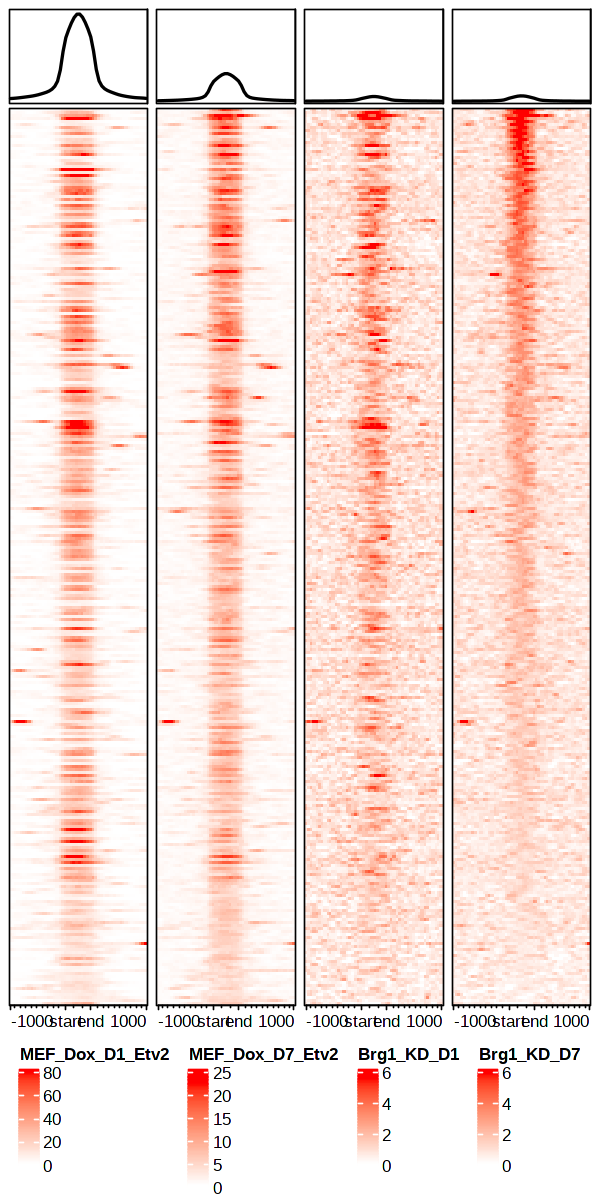

In [36]:
i <- 1:length(peaks_sub)
sp <- sp[sp == 'TRUE_TRUE']
ta <- HeatmapAnnotation(
  enriched = anno_enriched(
    gp = gpar(lty = 1, lwd = 2, col = 1:nlevels(sp)), 
    axis_param = list(facing = 'inside', at = -1000),
        ylim = c(0, 30)
  )
)
h <- EnrichedHeatmap(
  mat_sub[['MEF_Dox_D1_Etv2']][i, ], 
  col = col_fun[['MEF_Dox_D1_Etv2']],
  name = 'MEF_Dox_D1_Etv2', 
  top_annotation = ta, 
  pos_line = FALSE
)
ss <- c(
  'MEF_Dox_D7_Etv2', 'Brg1_KD_D1', 'Brg1_KD_D7'
)
for (s in ss[ss %in% names(bw_files)]){
  h <- h + EnrichedHeatmap(mat_sub[[s]][i, ], col = col_fun[[s]], name = s, top_annotation = ta, pos_line = FALSE)
}
options(repr.plot.width = 5, repr.plot.height = 10)
draw(h, heatmap_legend_side = 'bottom', row_order = order(enriched_score(mat_sub[['Brg1_KD_D7']]), decreasing = TRUE))

We visually see reduced intensity at the center for Brg1_KD_D7 conditiona as compared to the other 3 conditions.

In [37]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] ChIPseeker_1.29.1.991              circlize_0.4.13                   
 [3] EnrichedHeatmap_1.22.0             ComplexHeatmap_2.8.0              
 [5] ggplot2_3.3.5                      SummarizedExperiment_1.22.0       
 [7] Biob

In [38]:
Sys.time() - start_time0

Time difference of 1.612924 hours